In [ ]:
from numpy import zeros
from numpy import asarray
import os
import numpy as np
import cv2
from keras.models import Model
from keras.layers import Input
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
# Multilayer Perceptron
from keras.utils import plot_model
from PIL import Image
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,MaxPool2D,SeparableConv2D,DepthwiseConv2D,concatenate,LeakyReLU
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception
from matplotlib import pyplot
# from keras_flops import get_flops
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
import os

#connect with drive
from google.colab import drive
drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/datasets/plant_disease.zip' -d '/content/'


# saving model with every epoch
early_stop = EarlyStopping(monitor='val_loss', patience=200, verbose=1)
model_filepath = "/content/trained_models/model-{epoch:02d}-val_acc-{val_accuracy:.4f}.keras"
# model_filepath = ""
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

callback_list=[checkpoint]

#classes
classes_names=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight",
               "Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot",
               "Tomato___Spider_mites Two-spotted_spider_mite",
               "Tomato___Target_Spot","Tomato___Tomato_Yellow_Leaf_Curl_Virus",
               "Tomato___Tomato_mosaic_virus","Tomato___healthy"]


# taking images from directory
labels = list()
img_data = list()
l = 0
for j in range(0,10):
  path=('/content/Plant_leave_diseases_dataset_without_augmentation/'+classes_names[j])

  for root,dirs,files in os.walk(path):
      for file in files:
          if file.endswith('.jpg') or file.endswith('.JPG'):
              image = cv2.imread(os.path.join(root,file))
              image = cv2.resize(image,(100,100))
              img_data.append(image)
              labels.append(l)
      l = l+1

# spliting dataset
x1_train,vx_test,y1_train,vy_test = train_test_split(img_data,labels,test_size=0.2)
x_train,x_test,y_train,y_test = train_test_split(x1_train,y1_train,test_size=0.25)

#see length of test & traing
print(len(y_train))
print(len(y_test))
print(len(vy_test))

# rescaling
vx_test = asarray(vx_test)

x_train = asarray(x_train)

y_train = to_categorical(y_train)
vy_test = to_categorical(vy_test)



#run-time augmenation
IMG_SIZE = 100

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.Rescaling(1./255)
])
# data_augmenation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("Horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomTranslation(height_factor=(0.1),width_factor=(0.1)),
])

model = Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.SeparableConv2D(32,(3,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.SeparableConv2D(64,(5,5),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.SeparableConv2D(64,(7,7), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.SeparableConv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
# model.summary()
#compiling
model.compile(loss='categorical_crossentropy',
              optimizer= keras.optimizers.AdamW(learning_rate=0.001), metrics=['accuracy'])
#training
history = model.fit(x_train,y_train, validation_data=(vx_test,vy_test),
                    epochs=1000,batch_size=16,callbacks=[callback_list])

Streaming output truncated to the last 5000 lines.
  inflating: /content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (4933).JPG  
  inflating: /content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (4934).JPG  
  inflating: /content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (4935).JPG  
  inflating: /content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (4936).JPG  
  inflating: /content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (4937).JPG  
  inflating: /content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (4938).JPG  
  inflating: /content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (4939).JPG  
  inflating: /content/Plant_leave_disea

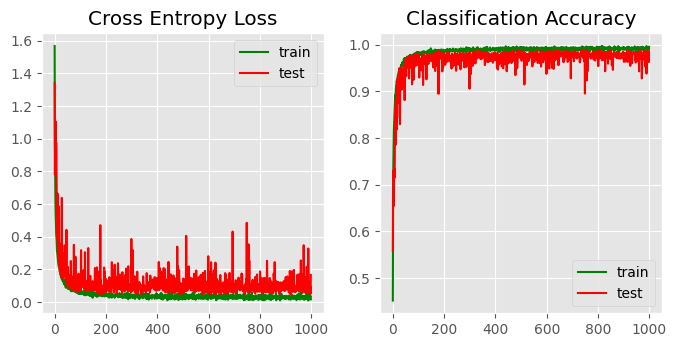

In [ ]:
def summarize_diagnostics(history): # raug-60-16-100-1000
    # plot loss
    pyplot.style.use('ggplot')
    pyplot.figure(figsize=(8,8))
    pyplot.subplot(2,2,1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='red', label='test')
    pyplot.legend()
#     pyplot.show()
    # plot accuracy
    pyplot.subplot(2,2,2)
#     pyplot.figure(figsize=(10,6))
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='red', label='test')
    pyplot.legend()
    pyplot.show()
summarize_diagnostics(history)